In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, PowerTransformer

In [2]:
# Load the dataset
def check_dataset(path):
  file_path = path
  data = pd.read_csv(file_path)

  #Check for null(NaN,Invalid) values
  null_values = data.isnull().sum()
  print("\nNull values in each column:")
  print(null_values)

  #Check for duplicate rows
  duplicates = data.duplicated().sum()
  print(f"\nNumber of duplicate rows: {duplicates}")

  #Check data types
  print("\nData types and basic info:")
  print(data.info())

  print("\nUnique values in categorical columns:")
  categorical_columns = data.select_dtypes(include=['object']).columns
  for col in categorical_columns:
      print(f"{col}: {data[col].unique()}")
  return data
data1=check_dataset('/content/drive/MyDrive/CSE422 project/unprocessed_dataset.csv')


Null values in each column:
year                    321
gender                  292
age                     294
location                303
race:AfricanAmerican      0
race:Asian                0
race:Caucasian            0
race:Hispanic             0
race:Other                0
hypertension            369
heart_disease           301
smoking_history         295
bmi                     317
hbA1c_level             296
blood_glucose_level     322
diabetes                323
dtype: int64

Number of duplicate rows: 3347

Data types and basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103333 entries, 0 to 103332
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  103012 non-null  float64
 1   gender                103041 non-null  object 
 2   age                   103039 non-null  float64
 3   location              103030 non-null  object 
 4   race:AfricanAmerican  

In [3]:
#Removing  rows missing diabetes value
data1=data1.drop_duplicates()
data1 = data1.dropna(axis = 0, subset = ['diabetes'])

In [4]:
#imputing in Location , gender , smoking history

data1['location'] = data1['location'].fillna('Unknown')
data1['gender'] = data1['gender'].fillna('Other')
data1['smoking_history'] = data1['smoking_history'].fillna('No Info')


In [5]:
#Imputing mean value
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

#Year
impute.fit(data1[['year']])
data1['year'] = np.round(impute.transform(data1[['year']]))
#Age
impute.fit(data1[['age']])
data1['age'] = np.round(impute.transform(data1[['age']]))

#bmi
impute.fit(data1[['bmi']])
data1['bmi'] = impute.transform(data1[['bmi']])
#hbA1c_level
impute.fit(data1[['hbA1c_level']])
data1['hbA1c_level'] = impute.transform(data1[['hbA1c_level']])
#blood_glucose_level
impute.fit(data1[['blood_glucose_level']])
data1['blood_glucose_level'] = np.round(impute.transform(data1[['blood_glucose_level']]))
#hypertension
impute.fit(data1[['hypertension']])
data1['hypertension'] = np.round(impute.transform(data1[['hypertension']]))
#heart_disease
impute.fit(data1[['heart_disease']])
data1['heart_disease'] = np.round(impute.transform(data1[['heart_disease']]))

In [6]:
#Categorical encoding
le_gender = LabelEncoder()
le_location = LabelEncoder()
le_smoking_history = LabelEncoder()

data1['Gender'] = le_gender.fit_transform(data1['gender'])
data1['Location'] = le_location.fit_transform(data1['location'])
data1['Smoking_History'] = le_smoking_history.fit_transform(data1['smoking_history'])
data1 = data1.drop(['gender','location','smoking_history'],axis=1)

In [7]:
#Removing duplicates
data1=data1.drop_duplicates()

In [8]:
#test check
modified_file_path = "/content/drive/MyDrive/CSE422 project/preprocessed_dataset1.csv"
data1.to_csv(modified_file_path, index=False)
data1=check_dataset("/content/drive/MyDrive/CSE422 project/preprocessed_dataset1.csv")
data1.shape


Null values in each column:
year                    0
age                     0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
Gender                  0
Location                0
Smoking_History         0
dtype: int64

Number of duplicate rows: 0

Data types and basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99674 entries, 0 to 99673
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  99674 non-null  float64
 1   age                   99674 non-null  float64
 2   race:AfricanAmerican  99674 non-null  int64  
 3   race:Asian            99674 non-null  int64  
 4   race:Caucasian        99674 non-null  int64  
 5   race:Hispanic 

(99674, 16)

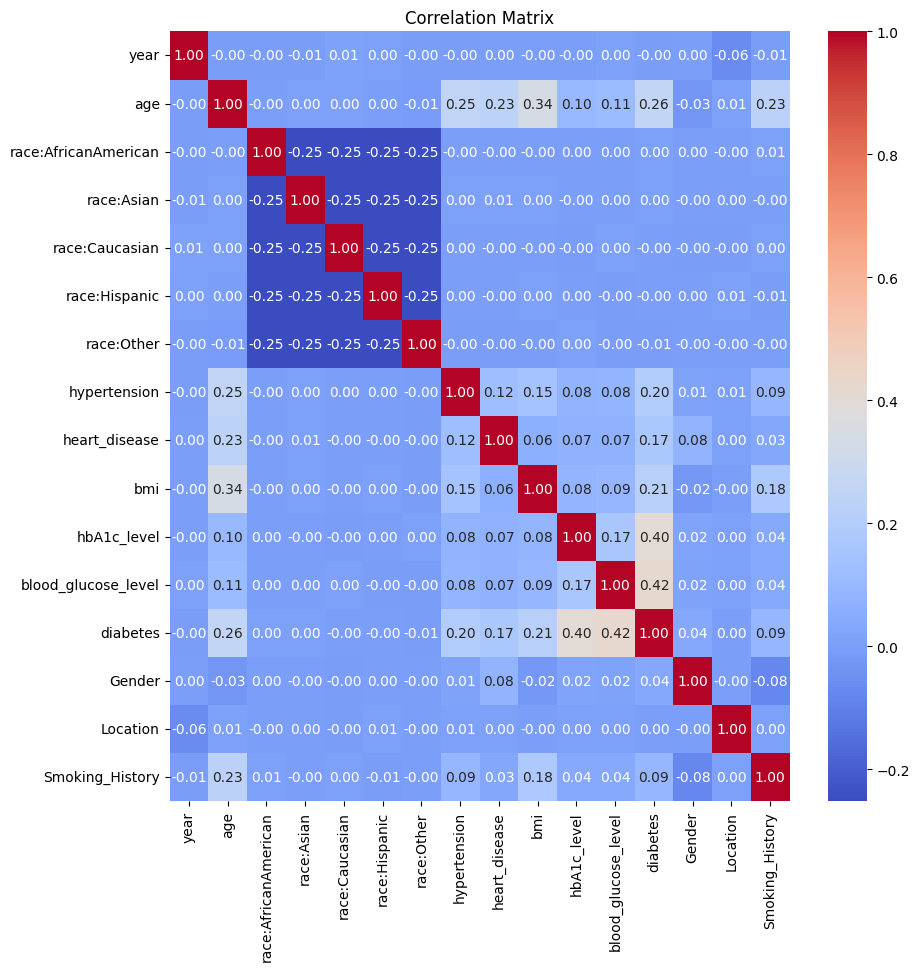

In [10]:
#Correlation Matrix
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data1.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()